<a href="https://colab.research.google.com/github/Matheus-dos-Santos-Teixeira/Brazilian-Sign-Language-CNN-LSTM/blob/main/Creating_a_Brazilian_Sign_Language_system_using_CNN_and_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<left><font style="color:rgb(100,109,254)">Creating a Brazilian Sign Language system using CNN and LSTM</font> </left>**


<div float=left;margin=auto;>
<img src='https://drive.google.com/uc?export=download&id=14zmsDXNI_7m1jhcdvZgUIERnmAXvbKs3'>
<img src='https://drive.google.com/uc?export=download&id=1Ehx1X-tBBD6zM6htpxvw06M_n5wQwwjN'>
<img src='https://drive.google.com/uc?export=download&id=1VP59HN6OBhJ5LcMRoCszjmU0Z99wzAp_'>
</div>

<br>

<h2><font style="color:rgb(100,109,254)">20 words were used in this project.</h2>

<br>

<p><font style="color:rgb(100,109,254)">The words used were:</p>
<br>


1.   <font style="color:rgb(100,109,254)">ACONTECER (to happen)
2.   <font style="color:rgb(100,109,254)">ALUNO (student)
3.   <font style="color:rgb(100,109,254)">AMARELO (yellow)
4.   <font style="color:rgb(100,109,254)">AMERICA (america)
5.   <font style="color:rgb(100,109,254)">APROVEITAR (to enjoy)
6.   <font style="color:rgb(100,109,254)">BALA (candy)
7.   <font style="color:rgb(100,109,254)">BANCO (bank)
8.   <font style="color:rgb(100,109,254)">BANHEIRO (bathroom)
9.   <font style="color:rgb(100,109,254)">BARULHO (noise)
10.   <font style="color:rgb(100,109,254)">CINCO (five)
11.  <font style="color:rgb(100,109,254)">CONHECER (to meet)
12.  <font style="color:rgb(100,109,254)">ESPELHO (mirror)
13.  <font style="color:rgb(100,109,254)">ESQUINA (corner)
14.  <font style="color:rgb(100,109,254)">FILHO (son)
15.  <font style="color:rgb(100,109,254)">MAÇÃ (apple)
16.  <font style="color:rgb(100,109,254)">MEDO (fear)
17.  <font style="color:rgb(100,109,254)">RUIM (bad)
18.  <font style="color:rgb(100,109,254)">SAPO (frog)
19.  <font style="color:rgb(100,109,254)">VACINA (vaccine)
20.  <font style="color:rgb(100,109,254)">VONTADE (will)






In [1]:
# Logging Google Drive into Colab

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Creating the 'Train' folder where the video classes will be copied to this folder using linux commands in colab.

!mkdir Train
!cp -a /content/drive/MyDrive/videos/* /content/Train

In [3]:
# Downloading 'keras.video' where it will be using an external library to use convolutional 
# neural network and LSTM in videos with the keras distribution. 

!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=15Ke1PNNze6w_cW1k1HWv8Up3x-l9YSUo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=15Ke1PNNze6w_cW1k1HWv8Up3x-l9YSUo" -O keras_video.zip && rm -rf /tmp/cookies.txt 
!unzip keras_video.zip -d ./

--2022-03-17 22:20:32--  https://docs.google.com/uc?export=download&confirm=&id=15Ke1PNNze6w_cW1k1HWv8Up3x-l9YSUo
Resolving docs.google.com (docs.google.com)... 142.250.136.138, 142.250.136.113, 142.250.136.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.136.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tneq9bd18uje7n3phv6p41mjh401gthc/1647555600000/17638697520222583078/*/15Ke1PNNze6w_cW1k1HWv8Up3x-l9YSUo?e=download [following]
--2022-03-17 22:20:32--  https://doc-0s-8o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/tneq9bd18uje7n3phv6p41mjh401gthc/1647555600000/17638697520222583078/*/15Ke1PNNze6w_cW1k1HWv8Up3x-l9YSUo?e=download
Resolving doc-0s-8o-docs.googleusercontent.com (doc-0s-8o-docs.googleusercontent.com)... 142.250.1.132, 2607:f8b0:4001:c24::84
Connecting to doc-0s-8o-docs.googleusercontent.com (doc-0s-

In [4]:
# Installing project dependencies

import numpy as np
import cv2
import os
import glob
from keras_video import *
from collections import deque
from moviepy.editor import *
import matplotlib.pyplot as plt
import random
%matplotlib inline

import tensorflow
from tensorflow.keras.layers import TimeDistributed, GRU, Dense, Dropout, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG19,ResNet50,MobileNet,InceptionV3, InceptionResNetV2, Xception, DenseNet121, VGG16
from tensorflow.keras.layers import LSTM , Dense , TimeDistributed, Flatten, Dropout, GlobalAveragePooling2D, GlobalAveragePooling1D, Input, GlobalMaxPool2D, Conv2D, MaxPool2D
from tensorflow.keras.layers import Reshape, BatchNormalization ,ConvLSTM2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam , RMSprop, SGD, Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint

physical_devices = tensorflow.config.experimental.list_physical_devices('GPU')
tensorflow.config.experimental.set_memory_growth(physical_devices[0], True)

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2514944/45929032 bytes (5.5%)5832704/45929032 bytes (12.7%)9306112/45929032 bytes (20.3%)12861440/45929032 bytes (28.0%)16433152/45929032 bytes (35.8%)19652608/45929032 bytes (42.8%)23224320/45929032 bytes (50.6%)26558464/45929032 bytes (57.8%)30212096/45929032 bytes (65.8%)33734656/45929032 bytes (73.4%)37298176/45929032 bytes (81.2%)40886272/45929032 bytes (89.0%)

In [5]:
# Using a pre-trained network role in network configuration. VGG16 was used as a pre-trained network.

def build_net(shape=(224, 224, 3)):
    model = VGG16(include_top=False,weights='imagenet',input_shape=shape)
    retrain = True
    for layer in model.layers:
        layer.trainable = retrain

    output = GlobalMaxPool2D()
    return Sequential([model, output])

In [6]:
# Creating the function to create the model.

def action_model(shape=(5, 112, 112, 3), nbout=3):

    # Create our convnet with (112, 112, 3) input shape
    convnet = build_net(shape[1:])
    # then create our final model
    model = Sequential()
    # add the convnet with (5, 112, 112, 3) shape
    model.add(TimeDistributed(convnet, input_shape=shape))
    # here, you can also use GRU or LSTM
    model.add(LSTM(128, return_sequences= True))
    model.add(LSTM(128))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(nbout, activation='softmax'))
    
    opti = Adam(learning_rate=0.00001)
    
    model.compile(loss='categorical_crossentropy', optimizer= opti, metrics=["accuracy"])

    return model

In [7]:
classes = [i.split(os.path.sep)[1] for i in glob.glob('Train/*')]
classes.sort() # some global params

SIZE = (128,128) # Image size
CHANNELS = 3 # Image Channels
NBFRAME = 15 # Number Frames
BS = 20 # BatchSize
EPOCHS=100

INSHAPE=(NBFRAME,) + SIZE + (CHANNELS,) # (5, 112, 112, 3)
glob_pattern='Train/{classname}/*.mp4'

#data_aug = keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,vertical_flip=True)

# Create video frame generator
train = VideoFrameGenerator(
    #method= METHOD_ABS_DIFF,
    #sequence_time=0.6,
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NBFRAME,
    split_val=0.25, 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    use_frame_cache=False)
    #transformation=data_aug,


valid = train.get_validation_generator()

model = action_model(INSHAPE, len(classes))

class ACONTECER, validation count: 15, train count: 45
class ALUNO, validation count: 13, train count: 42
class AMARELO, validation count: 13, train count: 42
class AMERICA, validation count: 13, train count: 42
class APROVEITAR, validation count: 15, train count: 45
class BALA, validation count: 15, train count: 45
class BANCO, validation count: 15, train count: 45
class BANHEIRO, validation count: 13, train count: 42
class BARULHO, validation count: 15, train count: 47
class CINCO, validation count: 13, train count: 42
class CONHECER, validation count: 13, train count: 42
class ESPELHO, validation count: 15, train count: 45
class ESQUINA, validation count: 13, train count: 42
class FILHO, validation count: 14, train count: 42
class MACA, validation count: 15, train count: 45
class MEDO, validation count: 13, train count: 42
class RUIM, validation count: 15, train count: 45
class SAPO, validation count: 15, train count: 45
class VACINA, validation count: 15, train count: 45
class VONT

In [8]:
# Creating the function to create the model.

model.load_weights('/content/drive/MyDrive/new_LIBRAS-20.h5')

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/ponto_salvo.index'

In [ ]:
model.load_weights(checkpoint_filepath)

In [ ]:
# Creating a checkpoint to run next time.

# How Google Colab was used, as the Colab GPU uses up to 12 hours of free use per day.

checkpoint_filepath = '/content/drive/MyDrive/saved_checkpoint'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
# Starting to train the network.

history = model.fit(train,validation_data=valid,epochs=EPOCHS,callbacks=[model_checkpoint_callback])

Epoch 1/100
43/43 [==============================] - 187s 4s/step - loss: 0.1996 - accuracy: 0.9535 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 2/100
43/43 [==============================] - 150s 3s/step - loss: 0.1710 - accuracy: 0.9500 - val_loss: 0.0343 - val_accuracy: 0.9929
Epoch 3/100
43/43 [==============================] - 151s 3s/step - loss: 0.1427 - accuracy: 0.9570 - val_loss: 0.0482 - val_accuracy: 0.9893
Epoch 4/100
43/43 [==============================] - 149s 3s/step - loss: 0.1683 - accuracy: 0.9453 - val_loss: 0.0187 - val_accuracy: 0.9964
Epoch 5/100
43/43 [==============================] - 150s 3s/step - loss: 0.1595 - accuracy: 0.9547 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/100
43/43 [==============================] - 149s 3s/step - loss: 0.1490 - accuracy: 0.9605 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/100
43/43 [==============================] - 150s 3s/step - loss: 0.1479 - accuracy: 0.9558 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 

In [ ]:
# Save the model

model.save("/content/drive/MyDrive/new_LIBRAS-20.h5")

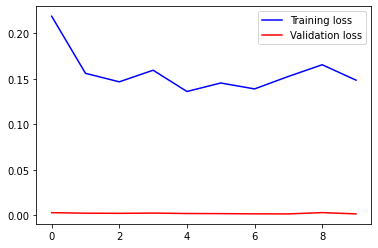

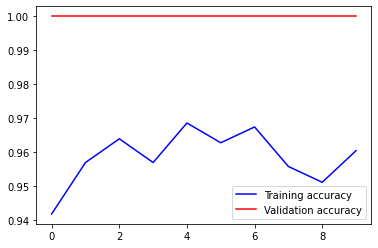

In [ ]:
# Showing the accuracy and loss data, referring to training and accuracy.

import matplotlib.pyplot as plt

def plot_results(history):  
  loss = history.history['loss'] 
  val_loss = history.history['val_loss']
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.legend()

  plt.show()
  plt.plot(epochs, acc, 'b', label='Training accuracy')
  plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
  plt.legend()

  plt.show()

plot_results(history) 

In [ ]:
from pathlib import Path
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0]
 [ 0  0  0  0  

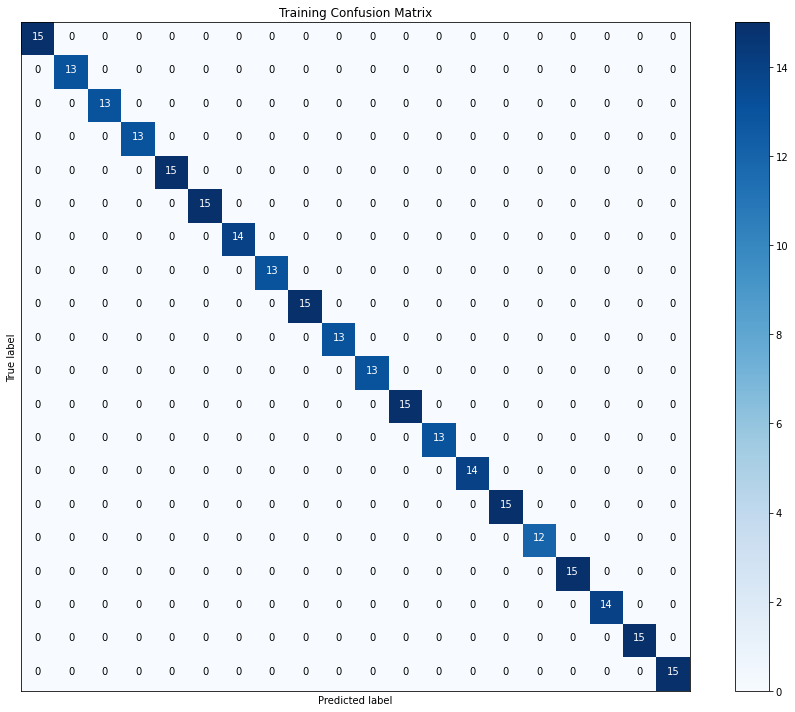

In [ ]:
from IPython.core.pylabtools import figsize
classes_names = [i.split(os.path.sep)[1] for i in glob.glob('train/*')]
classes_names.sort()# some global params

y_test = []
idx=1
for x in range(valid.__len__()):
    #position [1] for labels
    batch = valid.__getitem__(x)[1]
    for y in range(batch.shape[0]):
        y_test.append(batch[y])
        idx=idx+1
#Get labels indices

y_test = np.argmax(y_test, axis=1)
y_pred = model.predict(valid)
y_predicted_class = np.argmax(y_pred, axis=1)

cnf_matrix = confusion_matrix(y_test,y_predicted_class)
figsize(13,10)
plot_confusion_matrix(cnf_matrix,classes=classes_names,title="Training Confusion Matrix")

In [ ]:
# Showing the precision, recall and f1-score.

from sklearn.metrics import classification_report
print("classification_report = ")
print(classification_report(y_test,y_predicted_class))
print("confusion_matrix = ")
print(confusion_matrix(y_test,y_predicted_class))

classification_report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        15
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        13
          10       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        15
          12       1.00      1.00      1.00        13
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        15
          15       1.00      1.00      1.00        13
          16       1.00      1.00      1.00        15
  

In [ ]:
import seaborn as sns

In [ ]:
model.save("/content/drive/MyDrive/weights_LIBRAS/LIBRAS-10.h5") 

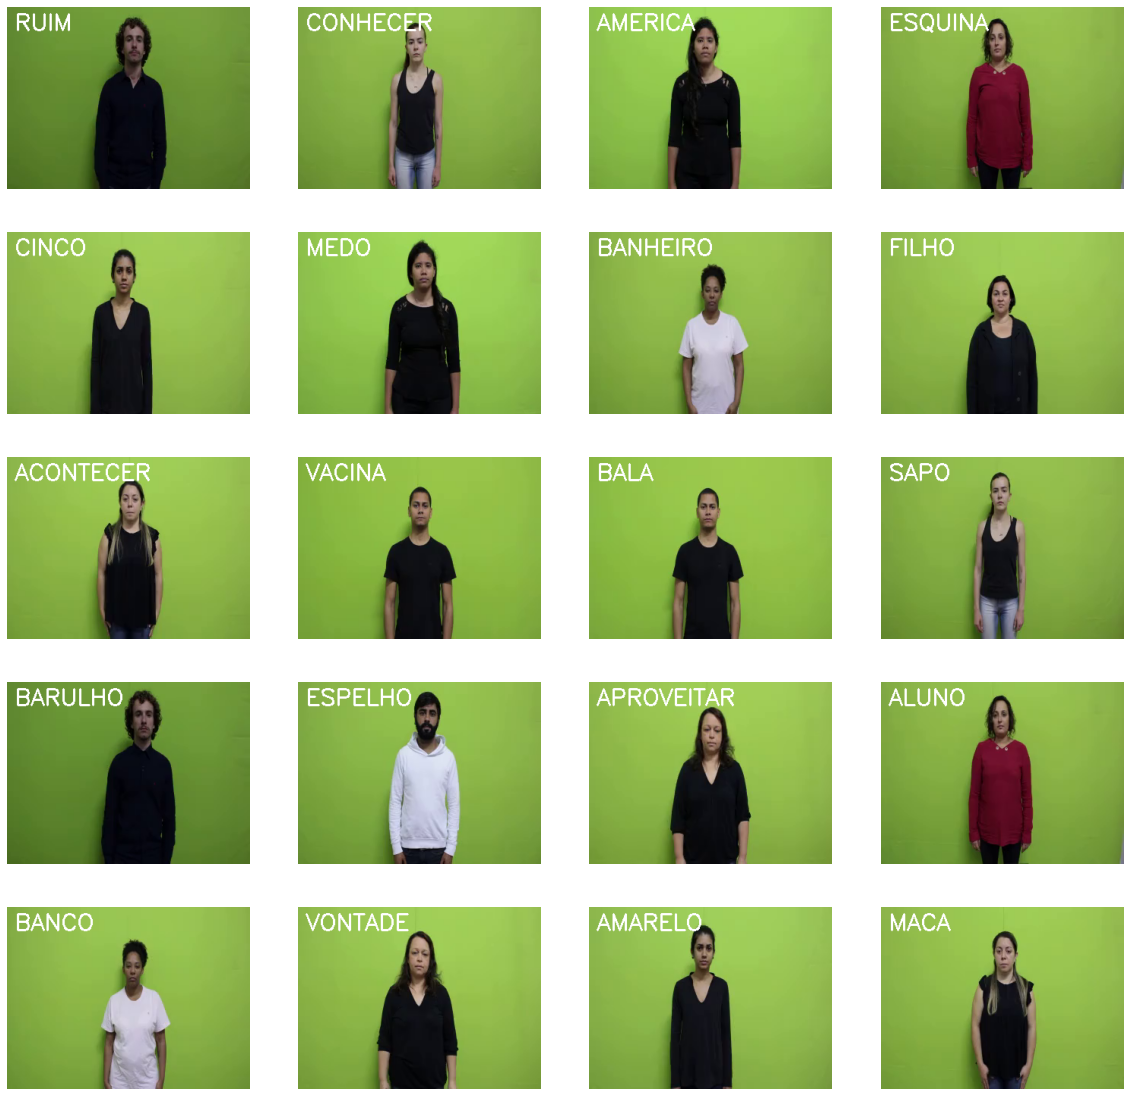

In [ ]:
# Create a Matplotlib figure and specify the size of the figure.
plt.figure(figsize = (20, 20))

# Generate a list at random, where you will get only one video, 
# to demonstrate the words used in the project.
random_range = random.sample(range(len(classes)), 20)

# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):

    # Retrieve a Class Name using the Random Index.
    selected_class_Name = classes[random_index]

    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'Train/{selected_class_Name}')

    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)

    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'Train/{selected_class_Name}/{selected_video_file_name}')
    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()

    # Release the VideoCapture object. 
    video_reader.release()

    # Convert the frame from BGR into RGB format. 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)

    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

In [17]:
def predict_single_action(video_file_path, SEQUENCE_LENGTH):
    '''
    This function will perform single action recognition prediction on a video using the model.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)

    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Declare a list to store video frames we will extract.
    frames_list = []
    
    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    # Get the number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH),1)

    # Iterating the number of times equal to the fixed length of sequence.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Read a frame.
        success, frame = video_reader.read() 

        # Check if frame is not read properly then break the loop.
        if not success:
            break

        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, SIZE)
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        normalized_frame = resized_frame / 255
        
        # Appending the pre-processed frame into the frames list
        frames_list.append(normalized_frame)

    # Passing the  pre-processed frames to the model and get the predicted probabilities.
    predicted_labels_probabilities = model.predict(np.expand_dims(frames_list, axis = 0))[0]

    # Get the index of class with highest probability.
    predicted_label = np.argmax(predicted_labels_probabilities)

    # Get the class name using the retrieved index.
    predicted_class_name = classes[predicted_label]
    
    # Display the predicted action along with the prediction confidence. In (%).
    print(f'Action Predicted: {predicted_class_name}\nConfidence: {100 * predicted_labels_probabilities[predicted_label]:.2f}%')
        
    # Release the VideoCapture object. 
    video_reader.release()

In [20]:
# Preview a random video referring to the word "ESPELHO".

predict_one = '/content/Train/ESPELHO/ESPELHO_25_xvid.mp4'

predict_single_action(predict_one, NBFRAME)

Action Predicted: ESPELHO
Confidence: 100.00%


In [21]:
# Preview a random video referring to the word "BANHEIRO".

predict_two = '/content/Train/BANHEIRO/BANHEIRO_12_xvid.mp4'

predict_single_action(predict_two, NBFRAME)

Action Predicted: BANHEIRO
Confidence: 99.90%


In [22]:
# Preview a random video referring to the word "VACINA".

predict_three = '/content/Train/VACINA/VACINA_45_xvid.mp4'

predict_single_action(predict_three, NBFRAME)

Action Predicted: VACINA
Confidence: 99.99%


In [ ]:
# Predict and say and save which word is being used in the video, 
# according to the model used in the project.
def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    '''
    This function will perform action recognition on a video using the model model.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    output_file_path: The path where the ouput video with the predicted action being performed overlayed will be stored.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''

    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)

    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Initialize the VideoWriter Object to store the output video in the disk.
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))

    # Declare a queue to store video frames.
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)

    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''

    # Iterate until the video is accessed successfully.
    while video_reader.isOpened():

        # Read the frame.
        ok, frame = video_reader.read() 
        
        # Check if frame is not read properly then break the loop.
        if not ok:
            break

        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, SIZE)
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        normalized_frame = resized_frame / 255

        # Appending the pre-processed frame into the frames list.
        frames_queue.append(normalized_frame)

        # Check if the number of frames in the queue are equal to the fixed sequence length.
        if len(frames_queue) == SEQUENCE_LENGTH:

            # Pass the normalized frames to the model and get the predicted probabilities.
            predicted_labels_probabilities = model.predict(np.expand_dims(frames_queue, axis = 0))[0]

            # Get the index of class with highest probability.
            predicted_label = np.argmax(predicted_labels_probabilities)

            # Get the class name using the retrieved index.
            predicted_class_name = classes[predicted_label]

        # Write predicted class name on top of the frame.
        cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

        # Write The frame into the disk using the VideoWriter Object.
        video_writer.write(frame)
        
    # Release the VideoCapture and VideoWriter objects.
    video_reader.release()
    video_writer.release()

In [ ]:
# Creating the folders referring to the predictions of the videos.

for i in range(len(classes)):
  os.makedirs(f'predicted_videos/{classes[i]}')

In [ ]:
# Predict to words in all videos.

videos = []
for i in range(len(classes)):
  videos.append([n.split(os.path.sep)[2] for n in glob.glob(f'Train/{classes[i]}/*.mp4')])
  videos[i].sort()
  for j in range(len(videos[i])):
    input_video_file_path = f'Train/{classes[i]}/{videos[i][j]}'
    output_video_file_path =  f'predicted_videos/{classes[i]}/PREDICTED_{videos[i][j].split("_")[0] + "_" + videos[i][j].split("_")[1]}.mp4'
    predict_on_video(input_video_file_path, output_video_file_path, NBFRAME)